In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import tensorflow as tf
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader, random_split

In [2]:
#Data augumentation and normalizing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

In [4]:
#loading the dataset
dataset = ImageFolder(root='./test', transform=transform)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 19899
    Root location: ./test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [5]:
print(dataset.classes)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '34', '35', '36', '37', '38', '39', '4', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '9']


In [6]:
classes=dataset.classes

In [7]:

# Splitting  the dataset into training, validation, and test sets
dataset_size=int(len(dataset))
train_dataset_size=int(0.7 * dataset_size)
validation_dataset_size = int(0.15 * dataset_size)
test_dataset_size = dataset_size-(train_dataset_size+validation_dataset_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_dataset_size, validation_dataset_size, test_dataset_size])
batch_size=64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("The Dataset size is              :",dataset_size)
print("The Train Dataset size is        :",train_dataset_size)
print("The Validation  Dataset size is  :",validation_dataset_size)
print("The Test  Dataset size is        :",test_dataset_size)

The Dataset size is              : 19899
The Train Dataset size is        : 13929
The Validation  Dataset size is  : 2984
The Test  Dataset size is        : 2986


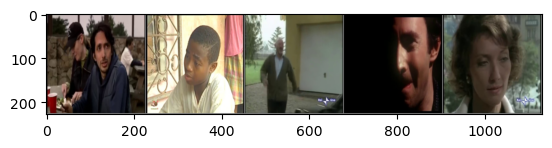

79           80           10           12           12          


In [8]:

#function to display 5 images from the training dataset
def displayimage(imgage):
    imgage = imgage / 2 + 0.5    
    npimg = imgage.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
data_iterator = iter(train_dataloader)
images, target_labels = next(data_iterator)
displayimage(torchvision.utils.make_grid(images[:5]))
print(' '.join(f'{classes[target_labels[j]]:12s}' for j in range(5)))

In [9]:

# Defining the  the convolutional_neural_network model
class convolutional_neural_network(nn.Module):
    def __init__(self):
        super(convolutional_neural_network, self).__init__()

        # Three Convolutional layers
        self.convolutional_layer1 = nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1)
        self.convolutional_layer2 = nn.Conv2d(20, 60, kernel_size=3, stride=1, padding=1)
        self.convolutional_layer3 = nn.Conv2d(60, 100, kernel_size=3, stride=1, padding=1)
        
        # Two Fully connected layers
        self.fully_connected_layer4 = nn.Linear(100 * 28 * 28, 100)
        self.fully_connected_layer5 = nn.Linear(100, 80)
        
        #relu activation function
        self.relu = nn.ReLU()
        
        #Maxpooling
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        #Adding dropout
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        
        conv1_out = self.maxpool(self.relu(self.convolutional_layer1(x)))
        conv2_out = self.maxpool(self.relu(self.convolutional_layer2(conv1_out)))
        conv3_out = self.maxpool(self.relu(self.convolutional_layer3(conv2_out)))
        flatten_output = conv3_out.view(x.size(0), -1)
        fc4_out = self.dropout(self.relu(self.fully_connected_layer4(flatten_output)))
        fc5_out = self.fully_connected_layer5(fc4_out)
        
        return fc5_out
      

In [10]:
#Displaying the model structure
cnn_model = convolutional_neural_network()
print(cnn_model)

convolutional_neural_network(
  (convolutional_layer1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convolutional_layer2): Conv2d(20, 60, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convolutional_layer3): Conv2d(60, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fully_connected_layer4): Linear(in_features=78400, out_features=100, bias=True)
  (fully_connected_layer5): Linear(in_features=100, out_features=80, bias=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [11]:
#Defining the lossfunction and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:

# Model Training and Validation
num_epochs = 20
training_accuracy_results = []
validation_accuracy_results= []
training_loss_results = []
validation_loss_results = []

# Training the model on train dataset

for epoch in range(num_epochs):
    cnn_model.train() 
    training_loss = 0.0
    training_correct = 0
    training_total = 0
    
    for images, actual_labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = cnn_model(images)
        actual_labels = actual_labels.squeeze().long()  
        loss = criterion(outputs, actual_labels)
        loss.backward()
        
        optimizer.step()
        
        training_loss = training_loss + loss.item() * images.size(0)
        _, predicted_labels = torch.max(outputs, 1)
        training_correct = training_correct +(predicted_labels == actual_labels).sum().item()
        training_total = training_total+actual_labels.size(0)
    
    training_loss = training_loss/len(train_dataset)
    training_accuracy = training_correct / training_total
    training_accuracy_results.append(training_accuracy)
    training_loss_results.append(training_loss)
    
    # Model evaluation on the validation dataset
    cnn_model.eval()  
    validation_loss = 0.0
    validation_correct = 0
    validation_total = 0
    
    with torch.no_grad():
        for images, actual_labels in validation_dataloader:
            outputs = cnn_model(images)
            actual_labels = actual_labels.squeeze().long()  
            loss = criterion(outputs, actual_labels)
            
            validation_loss =validation_loss + loss.item() * images.size(0)
            _, predicted_labels = torch.max(outputs, 1)
            validation_correct =validation_correct+ (predicted_labels == actual_labels).sum().item()
            validation_total = validation_total + actual_labels.size(0)
    
    validation_loss =validation_loss/ len(val_dataset)
    validation_accuracy = validation_correct / validation_total
    validation_accuracy_results.append(validation_accuracy)
    validation_loss_results.append(validation_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, training Loss: {training_loss:.4f}, validation Loss: {validation_loss:.4f}, Train Accuracy: {training_accuracy*100:.2f}%, validation Accuracy: {validation_accuracy*100:.2f}%')




Epoch 1/20, training Loss: 2.8733, validation Loss: 2.7481, Train Accuracy: 16.48%, validation Accuracy: 18.87%
Epoch 2/20, training Loss: 2.6554, validation Loss: 2.5915, Train Accuracy: 18.90%, validation Accuracy: 19.44%
Epoch 3/20, training Loss: 2.5487, validation Loss: 2.5256, Train Accuracy: 20.15%, validation Accuracy: 19.10%
Epoch 4/20, training Loss: 2.4603, validation Loss: 2.5017, Train Accuracy: 20.78%, validation Accuracy: 19.10%
Epoch 5/20, training Loss: 2.3931, validation Loss: 2.4870, Train Accuracy: 21.04%, validation Accuracy: 18.00%
Epoch 6/20, training Loss: 2.3301, validation Loss: 2.4801, Train Accuracy: 22.46%, validation Accuracy: 19.14%
Epoch 7/20, training Loss: 2.2671, validation Loss: 2.5017, Train Accuracy: 22.92%, validation Accuracy: 18.70%
Epoch 8/20, training Loss: 2.2186, validation Loss: 2.4959, Train Accuracy: 24.00%, validation Accuracy: 18.40%
Epoch 9/20, training Loss: 2.1652, validation Loss: 2.5209, Train Accuracy: 24.60%, validation Accuracy:

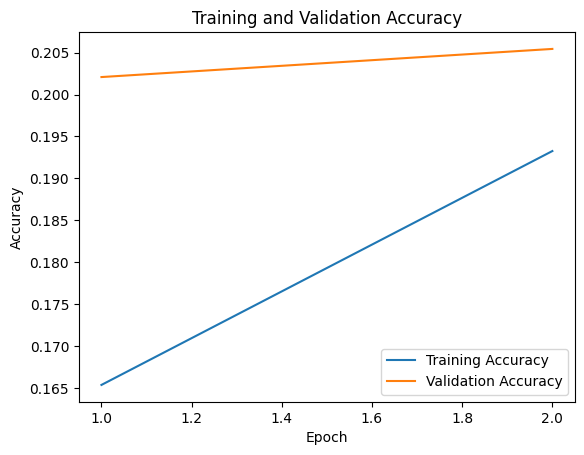

In [26]:
# Plotting the training and validation accuracy over time (epochs).

epochs=range(1, num_epochs+1)
plt.plot(epochs, training_accuracy_results, label='Training Accuracy')
plt.plot(epochs, validation_accuracy_results, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

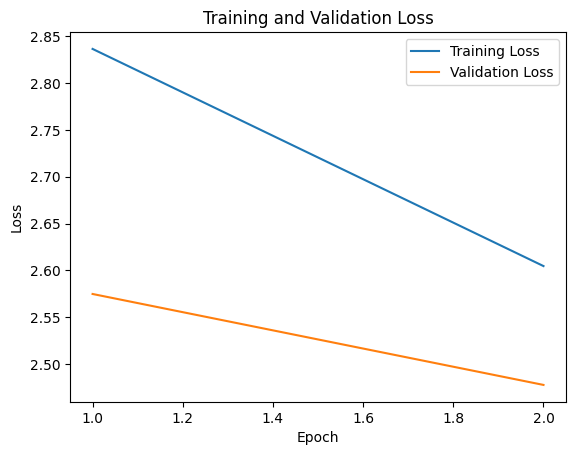

In [27]:
# Plotting the training and validation loss over time (epochs)
plt.plot(epochs, training_loss_results, label='Training Loss')
plt.plot(epochs, validation_loss_results, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [28]:


# Testing the model on the test dataset 
testing_accuracy_results = []
testing_loss_results = []
actual_labels_list=[]
predicted_labels_list=[]
cnn_model.eval()  
total_correct = 0
total_samples = 0

for images, actual_labels in test_dataloader:
    with torch.no_grad():
        outputs = cnn_model(images)
        actual_labels = actual_labels.squeeze().long()  
        actual_labels_list.extend(actual_labels.numpy())
        loss = criterion(outputs, actual_labels)
        
        _, predicted_labels = torch.max(outputs, 1)
        predicted_labels_list.extend(predicted_labels.numpy())
        correct = (predicted_labels == actual_labels).sum().item()
        total = actual_labels.size(0)
        
        accuracy = correct / total
        testing_accuracy_results.append(accuracy)
        testing_loss_results.append(loss.item())
        
        total_correct =total_correct+ correct
        total_samples = total_samples+total

avg_accuracy = total_correct / total_samples

print(f"Average Test Accuracy: {avg_accuracy*100:.3f}%")




Average Test Accuracy: 20.898%


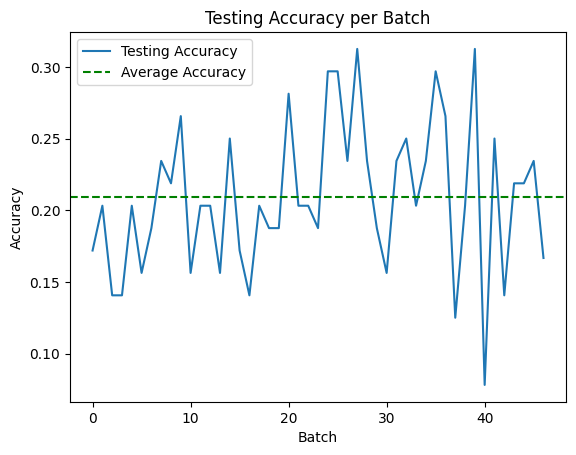

In [29]:
# Plotting the testing accuracy and testing loss for each batch
num_batches = range(len(testing_accuracy_results))
plt.plot(num_batches, testing_accuracy_results, label='Testing Accuracy')
plt.axhline(y=avg_accuracy, color='g', linestyle='--', label='Average Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy per Batch')
plt.legend(loc='best')
plt.show()


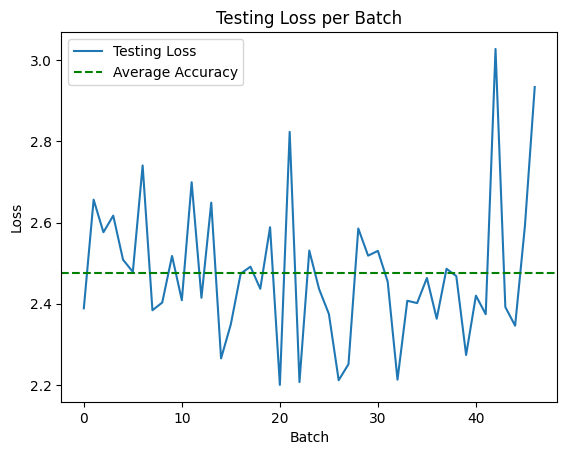

In [30]:
num_batches=range(len(testing_loss_results))
average_loss = sum(testing_loss_results)/len(testing_loss_results)
plt.plot(num_batches, testing_loss_results, label='Testing Loss')
plt.axhline(y=average_loss, color='g', linestyle='--', label='Average Accuracy')
plt.title('Testing Loss per Batch')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

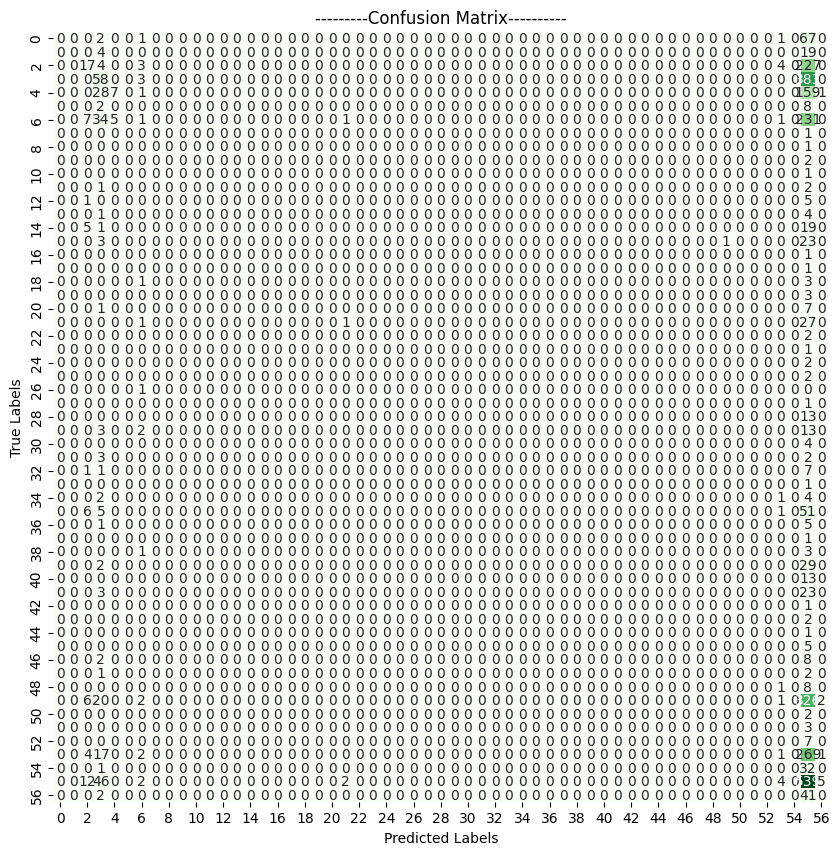

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generating the confusion matrix
confusion_mat = confusion_matrix(actual_labels_list, predicted_labels_list)

# Plotting  the confusion matrix 
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_mat, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("---------Confusion Matrix----------")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [34]:
# Calculating the  precision, recall, and F1 score
report = classification_report(actual_labels_list, predicted_labels_list)
print("-----------------------Classification Report----------------------")
print(report)

-----------------------Classification Report----------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.00      0.00      0.00        23
           2       0.29      0.07      0.11       255
           3       0.23      0.13      0.17       444
           5       0.58      0.04      0.07       196
           6       0.00      0.00      0.00        10
           8       0.05      0.00      0.01       280
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00        25
          21       0.00      0.00      0.00        27
          22  

C:\Users\RAKESH PASUPULETI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RAKESH PASUPULETI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RAKESH PASUPULETI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [39]:
import torch
import torch.nn.functional as F

scores = torch.tensor([2.0, 1.0, 0.5])
softmax_scores = F.softmax(scores, dim=0)
print(softmax_scores)


tensor([0.6285, 0.2312, 0.1402])
